Use pandas, numpy and matplotlib,seaborn
1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following
2. find all masala movie - (action ,romance,comedy,thriller)
3. plot a pie chart to represent genre and frequency of movie count
4. average rating for each movie and merge 2 frames
5. draw pie chart for each genre and average rating
6. draw bar graph for each rating and number of movies

### 1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("movies11.csv")
df2 = pd.read_csv("movie12.csv",header=None)
df3 = pd.read_csv("movies13.csv",header=None)
rating = pd.read_csv("rating11.csv")
df2.columns=df1.columns
df3.columns=df1.columns

movies=pd.concat([df1,df2,df3],ignore_index=True)

### 2. find all masala movie - (action ,romance,comedy,thriller)

In [2]:
masala_genre=['Action','Romance','Comedy','Thriller']
filter=movies[movies['genres'].apply(lambda x: all(genres in x.split('|') for genres in masala_genre))]
filter

,movieId,title,genres
351,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
2358,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
4599,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...
4835,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller
6429,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller
6579,6714,So Close (Chik Yeung Tin Sai) (2002),Action|Comedy|Romance|Thriller
9666,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller
10265,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller


### 3. plot a pie chart to represent genre and frequency of movie count

In [15]:
# # genre_count = movies['genres'].value_counts()
# # genre_counprint(genre)t
# movies['genres']=movies['genres'].str.split('|')
# genre= movies['genres']
# genre
genre_counts = movies['genres'].str.split('|').explode().value_counts()
genre_counts

genres
Drama          5415
Comedy         3672
Romance        1808
Thriller       1711
Action         1474
Crime          1205
Horror         1034
Adventure      1020
Sci-Fi          784
Mystery         581
Fantasy         548
Children        512
War             509
Musical         470
Documentary     453
Western         277
Animation       272
Film-Noir       141
IMAX             36
Name: count, dtype: int64

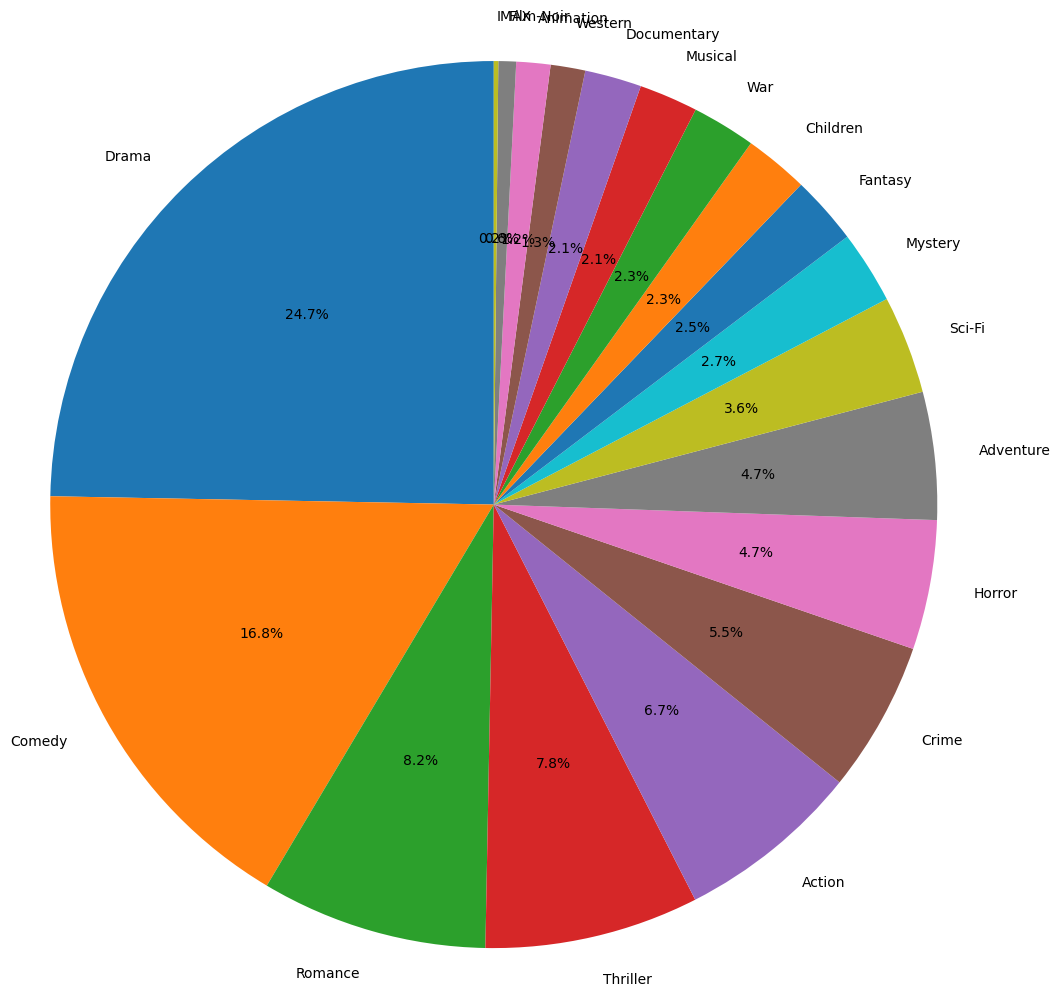

In [9]:

label_props = {'fontsize': 10}
plt.pie(genre_counts,labels=genre_counts.index,startangle=90,autopct='%.1f%%',textprops=label_props,radius =3)
plt.show()

### 4. Average rating for each movie and merge 2 frames

In [10]:
g=rating.groupby('movieId')
for mid,data in g:
    print("Movie id : ",mid)
    print(data)
    print("*"*60)

Movie id :  1
       userId  movieId  rating   timestamp
11          3        1     4.0   944919407
29          6        1     5.0   858275452
48          8        1     4.0   833981871
60         10        1     4.0   943497887
63         11        1     4.5  1230858821
...       ...      ...     ...         ...
57898    7110        1     4.0  1199461240
57946    7116        1     4.0  1139540576
57957    7117        1     4.0   903025677
57985    7119        1     5.0   834332667
57997    7120        1     4.5  1175542052

[2569 rows x 4 columns]
************************************************************
Movie id :  2
       userId  movieId  rating   timestamp
0           1        2     3.5  1112486027
19          5        2     3.0   851527569
86         13        2     3.0   849082742
222        29        2     3.0   835562174
281        34        2     3.0   846509384
...       ...      ...     ...         ...
57842    7100        2     3.5  1323015669
57850    7102        2    

In [11]:
rdata=g['rating'].mean()
print(rdata)

movieId
1      3.959323
2      3.268398
3      3.186861
4      3.000000
5      3.143836
         ...   
153    2.921099
154    3.794798
155    3.440678
156    3.505556
157    2.729927
Name: rating, Length: 153, dtype: float64


In [12]:
merge=pd.merge(movies,rdata,on='movieId')
merge

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.959323
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.268398
2,3,Grumpier Old Men (1995),Comedy|Romance,3.186861
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.000000
4,5,Father of the Bride Part II (1995),Comedy,3.143836
...,...,...,...,...
124,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,2.921099
125,154,Beauty of the Day (Belle de jour) (1967),Drama,3.794798
126,155,Beyond Rangoon (1995),Adventure|Drama|War,3.440678
127,156,Blue in the Face (1995),Comedy|Drama,3.505556


### 5. draw pie chart for each genre and average rating

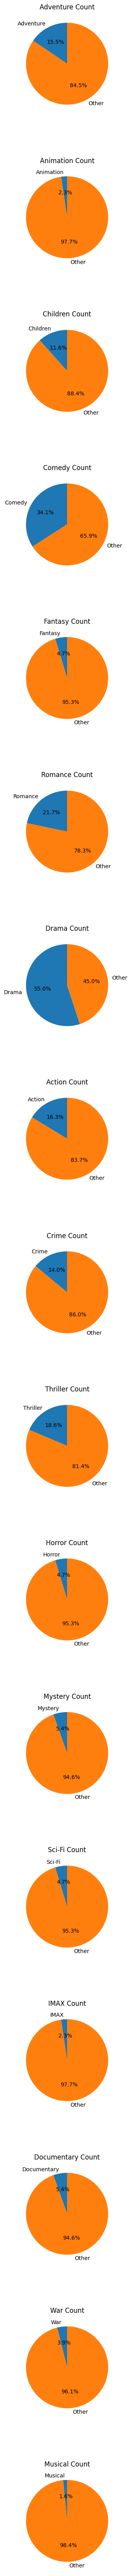

In [25]:

unique_genres = merge['genres'].str.split('|').explode().unique()
fig, axes = plt.subplots(len(unique_genres), 1, figsize=(6, 5 * len(unique_genres)))
plt.subplots_adjust(hspace=0.5)

for i, genre in enumerate(unique_genres):
    genre_data = merge[merge['genres'].str.contains(genre)]

    genre_counts = len(genre_data)

    axes[i].pie([genre_counts, len(merge) - genre_counts], labels=[genre, 'Other'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{genre} Count')

plt.show()

### 6. draw bar graph for each rating and number of movies

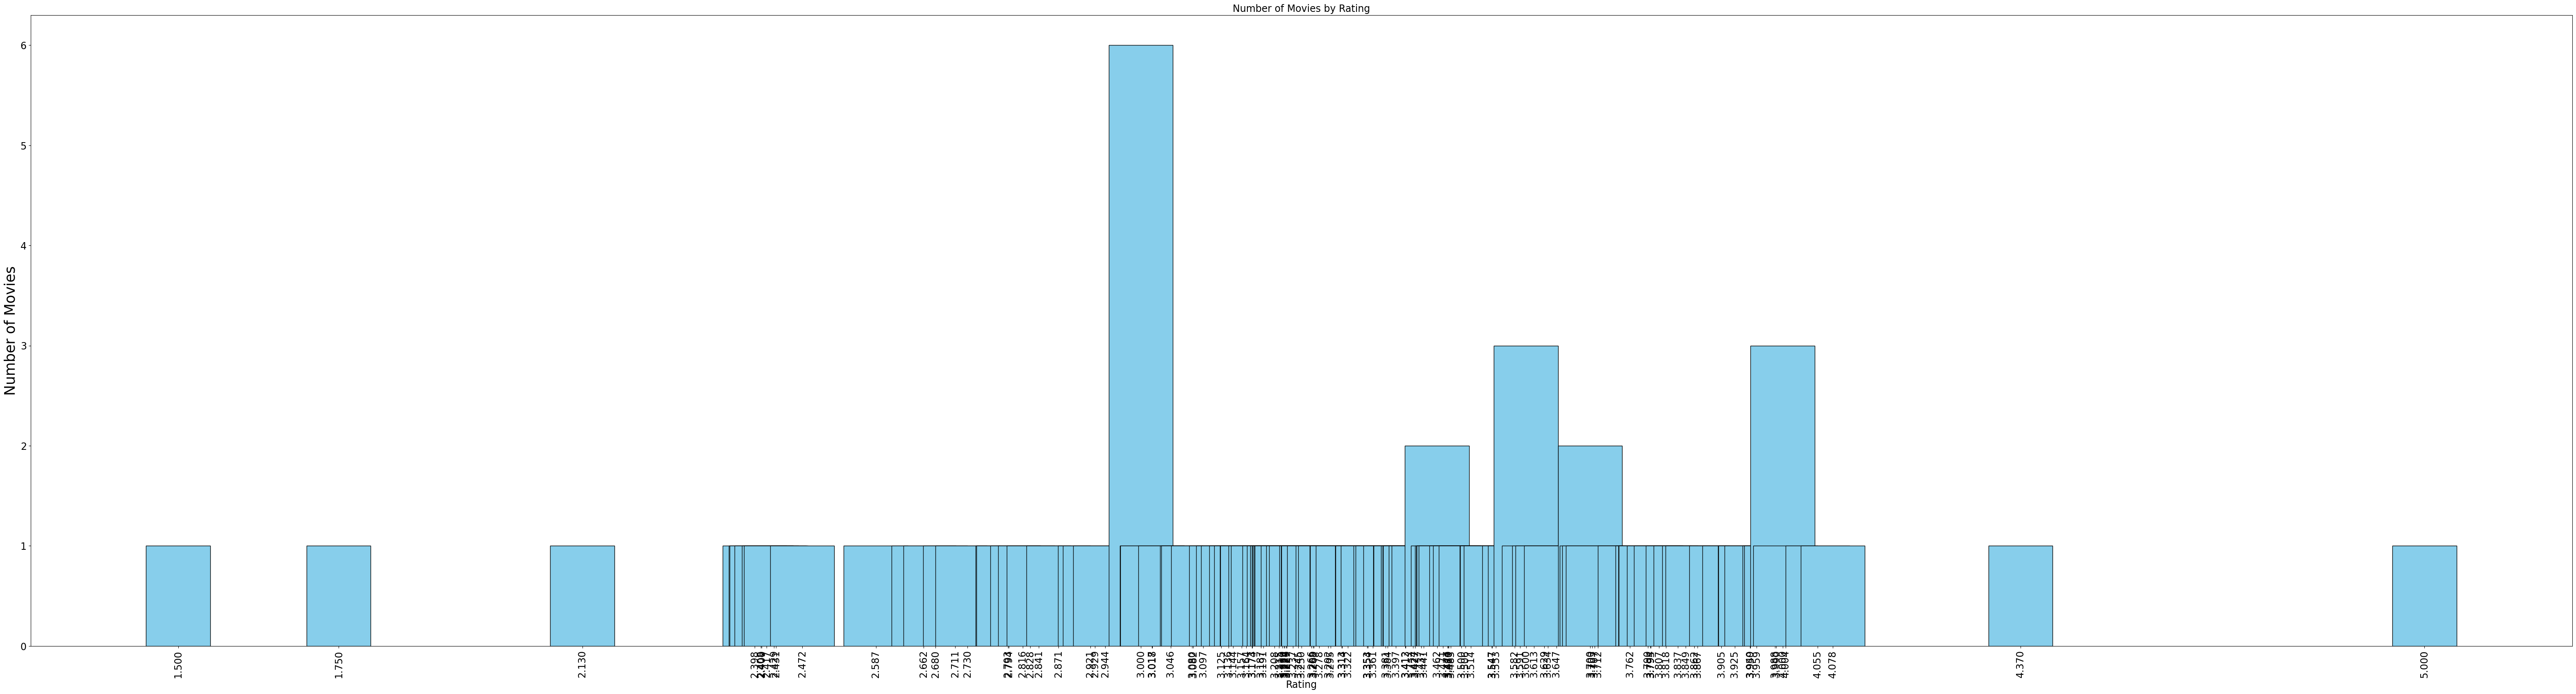

In [32]:

rating_counts = merge['rating'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(80,20))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue',width = 0.1,edgecolor = "black")
plt.xlabel('Rating',fontsize = 17)
plt.ylabel('Number of Movies',fontsize = 25)
plt.title('Number of Movies by Rating',fontsize = 17)
plt.xticks(rating_counts.index,fontsize = 17,rotation = 90)
plt.yticks(fontsize = 17)

# Show the plot
plt.show()
